In [1]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

In [108]:
def prob(x):
    l = 0.5
    if x > 0:
        return np.exp(-l * x)
    else:
        return 0

In [90]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize, high=x + 0.5 * stepsize)

In [103]:
def p_acc_MH(x_new, x_old, prob):
    return min(1, prob(x_new)/prob(x_old))

In [111]:
def sample_MH(x_old, prob, stepsize):
    x_new = proposal(x_old, stepsize)
    accept = np.random.random() < p_acc_MH(x_new, x_old, prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

In [93]:
def build_MH_chain(init, stepsize, n_total, prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], prob, stepsize)
        chain.append(state)
        n_accepted += accept
    
    acceptance_rate = n_accepted / float(n_total)
    
    return chain, acceptance_rate

In [109]:
chain, acceptance_rate = build_MH_chain(2.0, 3.0, 10000, prob)

print("Acceptance rate: {:.3f}".format(acceptance_rate))
last_states = ", ".join("{:.5f}".format(state) 
                        for state in chain[-10:])
print("Last ten states of chain: " + last_states)

Acceptance rate: 0.332
Last ten states of chain: 0.94639, 0.30993, 0.30993, 0.61854, 0.19913, 0.19913, 0.19913, 0.19913, 0.43271, 0.43271


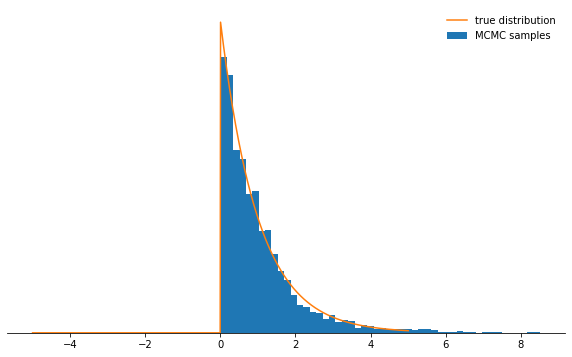

In [112]:
def plot_samples(chain, prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad
    
    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [prob(x) for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)
    
fig, ax = plt.subplots()
plot_samples(chain[500:], prob, ax)
despine(ax)
ax.set_yticks(())
plt.show()